CItation:  Min Li, Amy Mickel & Stanley Taylor (2018) “Should This Loan be Approved or
 Denied?”: A Large Dataset with Class Assignment Guidelines, Journal of Statistics Education, 26:1,
 55-66, DOI: 10.1080/10691898.2018.1434342

# Objectives

Nowaday, start-up is one of the hotest keywords, one way for most of businesses to get enough finalcial resources is having a loan from banks. The question is: As a representative
 of the bank, should I grant a loan to a particular small business
 (Company X)? Why or why not? 

# Prepare Dataset

## Dataset Descriptions

Small Business Administration (SBA) was founded in 1953 on the principle of promoting and assisting small enterprises in the U.S credit market. One way SBA assists these small business enterprises is through a loan guarantee program which is designed to encourage banks to grant loans to small businesses. 

Since SBA loans only guarantee a portion of the entire loan balance, banks will incur some losses if a small business defaults on its SBA-guarantedd loan. One way to avoid and explain for the banks decision is through analyzing relevant historical data "SBA-national"

Source: https://doi.org/10.1080/10691898.2018.1434342

# Process Data

## Types of dirty data

- Duplicated Data

- Outdated Data

- Imcomplete Data (Including Missing Values)

- Incorrect \ Inaccuracy Data

- Inconsistent Data 

### Step 0: Load Data

In [2]:
import pandas as pd

dypes = {
    "Zip": str,
    "NAICS": str,
    "Term": str,
    "NoEmp": str,
    "NewExist": str,
    "CreateJob": str,
    "RetainedJob": str,
    "FranchiseCode": str,
    "UrbanRural": str,
}
sba_national = pd.read_csv("SBAnational.csv", dtype=dypes,)
sba_national.head()

C:\Users\hoang\AppData\Local\Temp\ipykernel_18204\1477139865.py:14: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  sba_national = pd.read_csv("SBAnational.csv", dtype=dypes,)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


### Step 1: Remove Dulicated Data

In [3]:
n_dups = sba_national.duplicated().sum()
print(f"Number of duplicated data is: {n_dups}")

Number of duplicated data is: 0


In [4]:
n_dups = sba_national["LoanNr_ChkDgt"].duplicated().sum()
print(f"Number of duplicated data is: {n_dups}")

Number of duplicated data is: 0


There is no duplication in the datasets. With the problem "Outdated Data", I skip this since I don't need this analysis up-to-date.

### Step 2: Deal with Missing Values

In [5]:
def detect_missing_value(df: pd.DataFrame) -> None:
    print("Number of missing values:")
    flag = False
    missing = df.isnull().sum()

    for col in missing.index:
        if missing[col] > 0:
            flag = True
            print(f"{col}: {missing[col]}")

    if not flag:
        print("There is no missing values.")

detect_missing_value(sba_national)

Number of missing values:
Name: 14
City: 30
State: 14
Bank: 1559
BankState: 1566
NewExist: 136
RevLineCr: 4528
LowDoc: 2582
ChgOffDate: 736465
DisbursementDate: 2368
MIS_Status: 1997


For the Companies do not have the Name, I decide to delete them since it may be a fake information.

In [6]:
remove_missing_data = sba_national.copy()
misisng_pos = remove_missing_data[remove_missing_data["Name"].isnull()].index
remove_missing_data.drop(misisng_pos, axis=0, inplace=True)
remove_missing_data.reset_index(drop=True, inplace=True)

detect_missing_value(remove_missing_data)

Number of missing values:
City: 30
State: 14
Bank: 1559
BankState: 1566
NewExist: 136
RevLineCr: 4528
LowDoc: 2582
ChgOffDate: 736452
DisbursementDate: 2368
MIS_Status: 1997


In [7]:
remove_missing_data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


For the missing data in City and State, I use the data from SImple Map: https://postalpro.usps.com/ZIP_Locale_Detail,  for imputation. Althought there is no missing value in Zip, I have not checked the correctness of this feature, that why I need to get the data from the public reliable source.

- Step 1: Load data from Simple Map

- Step 2: Change the format of Remove_missing_data["City"] and us_db["city"] to the format: "New York" or "Los Angeles".

- Step 3: Change the format of State, to two Capital Letters.

- Step 4: Find the misisng values then use `Zip` to get the correct values.

In [8]:
# Step 1: Load Databases
dtype = {
    "City": str,
    "State_id": str,
    "Zip": str
}
us_db = pd.read_csv("USPS_database.csv", dtype=dtype)
us_db.head(10)

,City,State_id,Zip
0,ADJUNTAS,PR,00601
1,AGUADA,PR,00602
2,AGUADILLA,PR,00603
3,AGUADILLA,PR,00603
4,AGUADILLA,PR,00603
5,AGUADILLA,PR,00603
6,MARICAO,PR,00606
7,ANASCO,PR,00610
8,ANGELES,PR,00611
9,ARECIBO,PR,00612


In [9]:
# Step 2: Chagne format of `City`
import re
def format_city(city: str) -> str:
    try:
        city = city.lower()
    except Exception:
        raise Exception (f"{city} is not a string")
    city = city.strip()
    words = city.split(" ")
    words = [re.search(r"[a-z.]+", word) for word in words]
    city = " ".join([word.group().capitalize() for word in words if word])
    return city

remove_missing_data["City"] = remove_missing_data["City"].astype(str)
remove_missing_data["City"] = remove_missing_data["City"].apply(format_city)
us_db["City"] = us_db["City"].apply(format_city)

remove_missing_data["City"][:10]

0        Evansville
1         New Paris
2       Bloomington
3      Broken Arrow
4           Orlando
5        Plainville
6             Union
7       Summerfield
8    Port Saint Joe
9       Glastonbury
Name: City, dtype: object

In [10]:
# Step 3: Change the format of state_id
illegal_state_pos = remove_missing_data[remove_missing_data["State"].str.len() != 2].index
remove_missing_data = remove_missing_data.drop(illegal_state_pos)
remove_missing_data.reset_index(drop=True, inplace=True)

illegal_state_pos = us_db[us_db["State_id"].str.len() != 2].index
us_db = us_db.drop(illegal_state_pos)
us_db.reset_index(drop=True, inplace=True)

remove_missing_data["State"] = remove_missing_data["State"].apply(lambda x: x.upper())
us_db["State_id"] = us_db["State_id"].apply(lambda x: x.upper())

In [11]:
cities_dict = dict()

for row in us_db.itertuples():
    cities_dict[row.Zip] = {
        "state": row.State_id,
        "city": row.City
    }

cities_dict.keys()

dict_keys(['00601', '00602', '00603', '00606', '00610', '00611', '00612', '00616', '00617', '00622', '00623', '00624', '00627', '00631', '00637', '00638', '00641', '00646', '00647', '00650', '00652', '00653', '00656', '00659', '00660', '00662', '00664', '00667', '00669', '00670', '00674', '00676', '00677', '00678', '00682', '00680', '00683', '00685', '00687', '00688', '00690', '00692', '00693', '00698', '00703', '00704', '00705', '00707', '00714', '00715', '00717', '00718', '00719', '00720', '00721', '00723', '00725', '00729', '00730', '00735', '00736', '00738', '00739', '00740', '00791', '00741', '00744', '00745', '00751', '00754', '00757', '00765', '00766', '00767', '00769', '00771', '00772', '00773', '00775', '00777', '00778', '00780', '00782', '00783', '00784', '00786', '00794', '00795', '00802', '00820', '00830', '00840', '00850', '00901', '00911', '00907', '00909', '00915', '00918', '00968', '00924', '00926', '00927', '00925', '00921', '00936', '00979', '00940', '00949', '00952',

In [12]:
# Step 4: Fill missing values
missing_city_pos = remove_missing_data[remove_missing_data["City"].isnull()].index
remove_missing_data["Zip"] = remove_missing_data["Zip"].astype(str).apply(lambda x: x.zfill(5))
remains = []
for row in missing_city_pos:
    zip_code = remove_missing_data["Zip"][row]
    if zip_code in cities_dict:
        remove_missing_data["City"][row] = cities_dict[zip_code]["city"]
        remove_missing_data["State"][row] = cities_dict[zip_code]["state"]
    else:
        remains.append(row)

remove_missing_data = remove_missing_data.drop(remains)
remove_missing_data.reset_index(drop=True, inplace=True)
detect_missing_value(remove_missing_data)

Number of missing values:
Bank: 1558
BankState: 1565
NewExist: 136
RevLineCr: 4528
LowDoc: 2582
ChgOffDate: 736441
DisbursementDate: 2367
MIS_Status: 1996


For missing values in Bank, i choose select the most popular Bank in the State of that's company.

In [13]:
pivot_table = remove_missing_data.pivot_table(index="State", columns="Bank", values="Name", aggfunc=["count",])
most_popular_bank = dict()
for state in pivot_table.index:
    most_popular_bank[state] = pivot_table.loc[state, "count"].idxmax()
remove_missing_data["Bank"] = remove_missing_data["State"].map(most_popular_bank)
detect_missing_value(remove_missing_data)

Number of missing values:
BankState: 1565
NewExist: 136
RevLineCr: 4528
LowDoc: 2582
ChgOffDate: 736441
DisbursementDate: 2367
MIS_Status: 1996


For missing values in BankState, I create a dictionary to store pairs (Bank, BankState).

In [14]:
remove_missing_data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [15]:
bank_state = dict()
for row in remove_missing_data[["Bank", "State","BankState"]].itertuples():
    bank_state[row.Bank] = row.BankState if row.BankState else row.State
remove_missing_data["BankState"] = remove_missing_data["Bank"].map(bank_state)
detect_missing_value(remove_missing_data)

Number of missing values:
NewExist: 136
RevLineCr: 4528
LowDoc: 2582
ChgOffDate: 736441
DisbursementDate: 2367
MIS_Status: 1996


For the missing values in NewExist, since there is no information about the day the companied start, so delete all the misisng records.

In [16]:
remove_missing_data = remove_missing_data.dropna(subset=["NewExist"])
remove_missing_data.reset_index(drop=True, inplace=True)
detect_missing_value(remove_missing_data)

Number of missing values:
RevLineCr: 4528
LowDoc: 2579
ChgOffDate: 736319
DisbursementDate: 2367
MIS_Status: 1994


For missing values in RevLineCr, LowDoc, DisbursementDate and MIS_Status, there are just a small number of the datasets so I just remove it.

In [17]:
remove_missing_data = remove_missing_data.dropna(subset=["RevLineCr", "LowDoc", "DisbursementDate", "MIS_Status"])
remove_missing_data.reset_index(drop=True, inplace=True)
detect_missing_value(remove_missing_data)

Number of missing values:
ChgOffDate: 726820


For missing values in ChgOffDate, I decide to drop this feature since it was given by the SBA.

In [18]:
remove_missing_data = remove_missing_data.drop(columns=["ChgOffDate"])
remove_missing_data.reset_index(drop=True, inplace=True)
detect_missing_value(remove_missing_data)
print(f"Percent of data after cleaning: {len(remove_missing_data) / len(sba_national) * 100:.2f}%")

Number of missing values:
There is no missing values.
Percent of data after cleaning: 98.73%


In [19]:
# import pandas as pd

# dtype = {
#     "Zip": str,
#     "NAICS": str,
#     "Term": str,
#     "NoEmp": str,
#     "NewExist": str,
#     "CreateJob": str,
#     "RetainedJob": str,
#     "FranchiseCode": str,
#     "UrbanRural": str,
# }

# complete_df = pd.read_csv('SBAnational_complete.csv', dtype=dtype)
# complete_df.reset_index(drop=True, inplace=True)
# complete_df.head(10)

remove_missing_data.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,28-Feb-97,1997,...,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


# Preprocess steps

- For the features: LoanNr_ChkDgt, Name, City, State, Bank, BankState, Zip. All of these features were fixed before.

- For the feature: NAICS: In this feature, all records must be a 2 - through 6 -digit.

- For the date DisbursementDate and ApprovalDate: Must have the format DD-MMM-YY

- For the ApprovalFY: All must a number between 1953 (The day SBA was founded) and 2024 (current year) and must be the same as the year in ApprovalDate

- For Term, NoEmp, CreateJob, RetainedJob: All must be numbers greater than 0.

- For NewExist: Only letter in {1, 2}

- For FranchiseCode: All must be string.

- For UrbanRural: Only letter in {0, 1, 2}

- For RevLineCr and LowDoc: Only Y and N.

- For MIS_Status: Only string in {"PIF" and "CHGOFF"}

- For DisbursementGross, BalanceGross, ChgOffPrinGr, GrAppv, SBA_Appv: Make sure all unit in US Dollar, then convert them to number.

In [20]:
correct_data = remove_missing_data.copy()
correct_data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,28-Feb-97,1997,...,0,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,28-Feb-97,1997,...,0,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,28-Feb-97,1997,...,0,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,28-Feb-97,1997,...,0,N,Y,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,28-Feb-97,1997,...,0,N,N,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,28-Feb-97,1997,...,0,N,N,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,2-Jun-80,1980,...,0,N,N,22-Jul-80,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,28-Feb-97,1997,...,0,N,Y,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,28-Feb-97,1997,...,0,N,N,31-Jul-97,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,28-Feb-97,1997,...,0,N,Y,30-Apr-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


> The records having illegal NAICSare marked as '0' - unclassificated. 

In [21]:
# NAICS
correct_data['NAICS'] = correct_data['NAICS'].astype(str)
illegal_naics_pos = []
for row in correct_data.itertuples():
    if len(row.NAICS) > 6 or len(row.NAICS) < 2:
        illegal_naics_pos.append(row.Index)
        correct_data.at[row.Index, 'NAICS'] = '0'
print(f"Number of illegal NAICS: {len(illegal_naics_pos)}")

Number of illegal NAICS: 199178


> Use pandas.to_datetime() to correct the format of Date features.

In [22]:
from datetime import datetime

correct_data["ApprovalDate"] = pd.to_datetime(correct_data["ApprovalDate"], format="%d-%b-%y")
correct_data["DisbursementDate"] = pd.to_datetime(correct_data["DisbursementDate"], format="%d-%b-%y")
correct_data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,1997-02-28,1997,...,0,N,Y,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,1997-02-28,1997,...,0,N,Y,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,1997-02-28,1997,...,0,N,N,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,1997-02-28,1997,...,0,N,Y,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,N,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,1997-02-28,1997,...,0,N,N,1997-06-30,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,1980-06-02,1980,...,0,N,N,1980-07-22,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,1997-02-28,1997,...,0,N,Y,1998-06-30,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,1997-02-28,1997,...,0,N,N,1997-07-31,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,Y,1997-04-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


> Checking the years in ApprovalFY are legal.

In [23]:
illegal_approvalfy = []
for row in correct_data.itertuples():
    try:
        if row.ApprovalFY != str(row.ApprovalDate.year):
            correct_data.at[row.Index, 'ApprovalFY'] = str(row.ApprovalDate.year)
        year = correct_data.at[row.Index, 'ApprovalFY']
        if '1953' > year or year > '2024':
            illegal_approvalfy.append(row.Index)
    
    except Exception:
        raise Exception(f"Error in row {row.Index}: {row}")

print(f"Number of illegal ApprovalFY: {len(illegal_approvalfy)}")

Number of illegal ApprovalFY: 3


In [24]:
correct_data.loc[illegal_approvalfy, 'ApprovalFY']

690794    2068
713317    2068
724945    2068
Name: ApprovalFY, dtype: object

In [25]:
correct_data.drop(illegal_approvalfy, axis=0, inplace=True)
correct_data.reset_index(drop=True, inplace=True)
correct_data.loc[illegal_approvalfy, 'ApprovalFY']

690794    2004
713317    2004
724945    1994
Name: ApprovalFY, dtype: object

> For Term, CreateJob, RetainedJob, NoEmp. All must be numbers and non-negative.

In [26]:
correct_data['Term'] = correct_data['Term'].astype('uint')
correct_data['CreateJob'] = correct_data['CreateJob'].astype('uint')
correct_data['RetainedJob'] = correct_data['RetainedJob'].astype('uint')
correct_data['NoEmp'] = correct_data['NoEmp'].astype('uint')
correct_data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,1997-02-28,1997,...,0,N,Y,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,1997-02-28,1997,...,0,N,Y,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,1997-02-28,1997,...,0,N,N,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,1997-02-28,1997,...,0,N,Y,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,N,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,1997-02-28,1997,...,0,N,N,1997-06-30,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,1980-06-02,1980,...,0,N,N,1980-07-22,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,1997-02-28,1997,...,0,N,Y,1998-06-30,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,1997-02-28,1997,...,0,N,N,1997-07-31,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,Y,1997-04-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


> For NewExist, only 1 and 2 are acceptable.

In [27]:
new_exist = set(['1', '2'])
correct_data['NewExist'] = correct_data['NewExist'].astype('str')
illegal_new_exist = correct_data[~correct_data['NewExist'].isin(new_exist)].index
print(f"Number of illegal NewExist: {len(illegal_new_exist)}")

Number of illegal NewExist: 1020


In [28]:
correct_data.loc[illegal_new_exist, 'NewExist'].unique()

array(['0'], dtype=object)

In [29]:
correct_data.drop(illegal_new_exist, axis=0, inplace=True)
correct_data.reset_index(drop=True, inplace=True)

> Convert FranchiseCode to string

In [30]:
correct_data['FranchiseCode'] = correct_data['FranchiseCode'].astype('str')
correct_data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,1997-02-28,1997,...,0,N,Y,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,1997-02-28,1997,...,0,N,Y,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,1997-02-28,1997,...,0,N,N,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,1997-02-28,1997,...,0,N,Y,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,N,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,1997-02-28,1997,...,0,N,N,1997-06-30,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,1980-06-02,1980,...,0,N,N,1980-07-22,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,1997-02-28,1997,...,0,N,Y,1998-06-30,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,1997-02-28,1997,...,0,N,N,1997-07-31,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,Y,1997-04-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


> For UrbanRural, only 0, 1, 2 are accepted.

In [31]:
correct_data['UrbanRural'] = correct_data['UrbanRural'].astype('str')
urban_rural = set(['0', '1', '2'])
illegal_urban_rural = correct_data[~correct_data['UrbanRural'].isin(urban_rural)].index
print(f"Number of illegal UrbanRural: {len(illegal_urban_rural)}")

Number of illegal UrbanRural: 0


In [32]:
legal_bool = set(['Y', 'N'])
correct_data['RevLineCr'] = correct_data['RevLineCr'].astype('str')
correct_data['LowDoc'] = correct_data['LowDoc'].astype('str')

illegal_rev_line_cr = correct_data[~correct_data['RevLineCr'].isin(legal_bool)].index
illegal_low_doc = correct_data[~correct_data['LowDoc'].isin(legal_bool)].index
print(f"Number of illegal RevLineCr: {len(illegal_rev_line_cr)}")
print(f"Number of illegal LowDoc: {len(illegal_low_doc)}")

Number of illegal RevLineCr: 272490
Number of illegal LowDoc: 3154


> Let see the numbef of reacords in each value

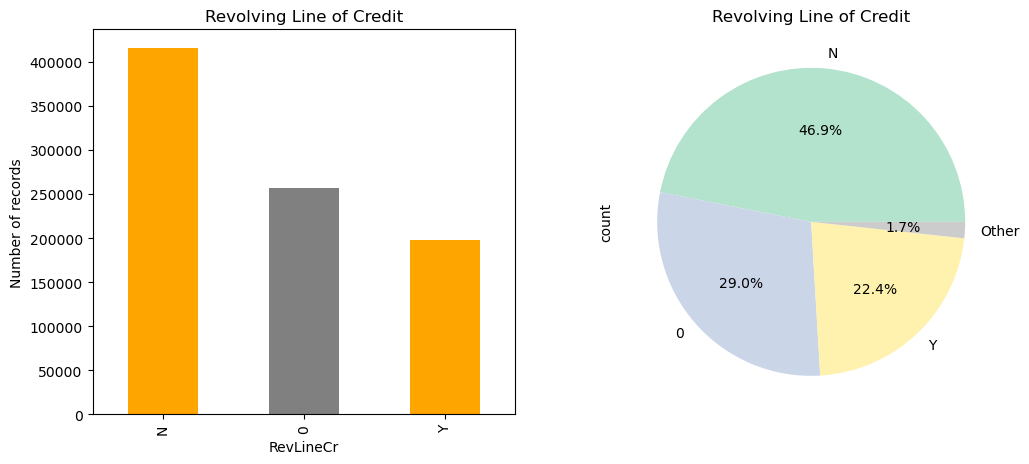

In [33]:
# Only the values that have more than 5 percents are shown
from matplotlib import pyplot as plt
import matplotlib as mpl

color_map = mpl.colormaps['Pastel2']

threshold = 0.05 * len(correct_data)
value_count = correct_data['RevLineCr'].value_counts()
value_count = value_count[value_count > threshold]

color = ['orange' if x == "Y" or x == "N" else 'grey' for x in value_count.index]
figs, axes = plt.subplots(1, 2, figsize=(12, 5))

value_count.plot(kind='bar', color=color, title="Revolving Line of Credit", 
                 xlabel="RevLineCr", ylabel="Number of records", ax=axes[0])

value_count_percent = value_count * 100 / len(correct_data)
value_count_percent.loc['Other'] = (100 - value_count_percent.sum())
value_count_percent.plot(kind='pie', cmap=color_map, title="Revolving Line of Credit", 
                         autopct='%1.1f%%', ax=axes[1])

plt.show()

> There are about 29% of the data that have a label '0' and about 1.7% others, which are invalid. At this point, I have 3 options:

1. Remove all the invalid label. Removing about 30% of data may be very risky, but in this dataset, there are more than 880 000 records so this is  not a big problem.

2. Assign the value 'N' - the mode for all invalid label. This cause the dataset look imbalance and create the bias: "Most of the companies don't want to get a revolving line of Credit."

3. Assign the value 'Y' to the invalid labels. This make the data look more balance, but it need more time to make sure this decision does not create the Bias.

> Since I don't have enough time to make sure that option 2 and 3 are fine, i choost the option 1. 

In [34]:
rev_line_cr = set(['Y', 'N'])
correct_data['RevLineCr'] = correct_data['RevLineCr'].astype('str')
illegal_rev_line_cr = correct_data[~correct_data['RevLineCr'].isin(rev_line_cr)].index

correct_data.drop(illegal_rev_line_cr, axis=0, inplace=True)
correct_data.reset_index(drop=True, inplace=True)

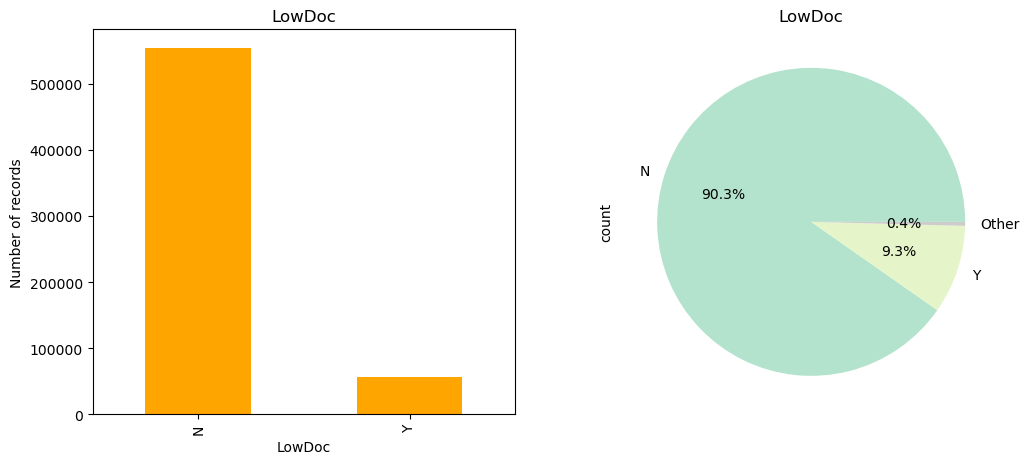

In [35]:
value_count = correct_data['LowDoc'].value_counts()
value_count = value_count[value_count > threshold]

color = ['orange' if x == "Y" or x == "N" else 'grey' for x in value_count.index]
figs, axes = plt.subplots(1, 2, figsize=(12, 5))

value_count.plot(kind='bar', color=color, title="LowDoc", 
                 xlabel="LowDoc", ylabel="Number of records", ax=axes[0])

value_count_percent = value_count * 100 / len(correct_data)
value_count_percent.loc['Other'] = (100 - value_count_percent.sum())
value_count_percent.plot(kind='pie', cmap=color_map, title="LowDoc", 
                         autopct='%1.1f%%', ax=axes[1])

plt.show()

> There are about 0.4 percent of the data are in Other lable so I just remove it.

In [36]:
low_doc = set(['Y', 'N'])
correct_data['LowDoc'] = correct_data['LowDoc'].astype('str')
illegal_low_doc = correct_data[~correct_data['LowDoc'].isin(low_doc)].index

correct_data.drop(illegal_low_doc, axis=0, inplace=True)
correct_data.reset_index(drop=True, inplace=True)

> For MIS_Status, only PIF and CHGOFF are accepted.

In [37]:
mis_status = ["P I F", "CHGOFF"]
correct_data['MIS_Status'] = correct_data['MIS_Status'].astype('str')
illegal_mis_status = correct_data[~correct_data['MIS_Status'].isin(mis_status)].index
print(f"Number of illegal MIS_Status: {len(illegal_mis_status)}")

correct_data.drop(illegal_mis_status, axis=0, inplace=True)
correct_data.reset_index(drop=True, inplace=True)

correct_data.head(10)

Number of illegal MIS_Status: 0


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,1997-02-28,1997,...,0,N,Y,1999-02-28,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,1997-02-28,1997,...,0,N,Y,1997-05-31,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,1997-02-28,1997,...,0,N,N,1997-12-31,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,1997-02-28,1997,...,0,N,Y,1997-06-30,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,N,1997-05-14,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,1997-02-28,1997,...,0,N,N,1997-06-30,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00"
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,1980-06-02,1980,...,0,N,N,1980-07-22,"$600,000.00",$0.00,CHGOFF,"$208,959.00","$600,000.00","$499,998.00"
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,1997-02-28,1997,...,0,N,Y,1998-06-30,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00"
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,1997-02-28,1997,...,0,N,N,1997-07-31,"$305,000.00",$0.00,P I F,$0.00,"$305,000.00","$228,750.00"
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,Y,1997-04-30,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"


In [38]:
illegal_disbursement_gross = correct_data[~correct_data['DisbursementGross'].str.find('$') > 0].index
illegal_balance_gross = correct_data[~correct_data['BalanceGross'].str.find('$') > 0].index
illegal_chg_off_prin_gr = correct_data[~correct_data['ChgOffPrinGr'].str.find('$') > 0].index
illegal_gr_apprvd = correct_data[~correct_data['GrAppv'].str.find('$') > 0].index
illegal_sba_apprvd = correct_data[~correct_data['SBA_Appv'].str.find('$') > 0].index

print(f"Number of illegal DisbursementGross: {len(illegal_disbursement_gross)}")
print(f"Number of illegal BalanceGross: {len(illegal_balance_gross)}")
print(f"Number of illegal ChgOffPrinGr: {len(illegal_chg_off_prin_gr)}")
print(f"Number of illegal GrAppv: {len(illegal_gr_apprvd)}")
print(f"Number of illegal SBA_Appv: {len(illegal_sba_apprvd)}")

Number of illegal DisbursementGross: 0
Number of illegal BalanceGross: 0
Number of illegal ChgOffPrinGr: 0
Number of illegal GrAppv: 0
Number of illegal SBA_Appv: 0


In [39]:
def format_currency(s):
    s = s.replace('$', '')
    s = s.replace(',', '')
    return float(s)

correct_data['DisbursementGross'] = correct_data['DisbursementGross'].apply(format_currency)
correct_data['BalanceGross'] = correct_data['BalanceGross'].apply(format_currency)
correct_data['ChgOffPrinGr'] = correct_data['ChgOffPrinGr'].apply(format_currency)
correct_data['GrAppv'] = correct_data['GrAppv'].apply(format_currency)
correct_data['SBA_Appv'] = correct_data['SBA_Appv'].apply(format_currency)
correct_data.head(10)

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,Evansville,IN,47711,"PNC BANK, NATIONAL ASSOCIATION",PA,451120,1997-02-28,1997,...,0,N,Y,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0
1,1000024006,LANDMARK BAR & GRILLE (THE),New Paris,IN,46526,"PNC BANK, NATIONAL ASSOCIATION",PA,722410,1997-02-28,1997,...,0,N,Y,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0
2,1000034009,"WHITLOCK DDS, TODD M.",Bloomington,IN,47401,"PNC BANK, NATIONAL ASSOCIATION",PA,621210,1997-02-28,1997,...,0,N,N,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",Broken Arrow,OK,74012,BANCFIRST,OK,0,1997-02-28,1997,...,0,N,Y,1997-06-30,35000.0,0.0,P I F,0.0,35000.0,28000.0
4,1000054004,"ANASTASIA CONFECTIONS, INC.",Orlando,FL,32801,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,N,1997-05-14,229000.0,0.0,P I F,0.0,229000.0,229000.0
5,1000084002,"B&T SCREW MACHINE COMPANY, INC",Plainville,CT,06062,BANK OF AMERICA NATL ASSOC,MD,332721,1997-02-28,1997,...,0,N,N,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0
6,1000093009,MIDDLE ATLANTIC SPORTS CO INC,Union,NJ,07083,BANK OF AMERICA NATL ASSOC,MD,0,1980-06-02,1980,...,0,N,N,1980-07-22,600000.0,0.0,CHGOFF,208959.0,600000.0,499998.0
7,1000094005,WEAVER PRODUCTS,Summerfield,FL,34491,BANK OF AMERICA NATL ASSOC,MD,811118,1997-02-28,1997,...,0,N,Y,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0
8,1000104006,TURTLE BEACH INN,Port Saint Joe,FL,32456,BANK OF AMERICA NATL ASSOC,MD,721310,1997-02-28,1997,...,0,N,N,1997-07-31,305000.0,0.0,P I F,0.0,305000.0,228750.0
9,1000124001,INTEXT BUILDING SYS LLC,Glastonbury,CT,06073,BANK OF AMERICA NATL ASSOC,MD,0,1997-02-28,1997,...,0,N,Y,1997-04-30,70000.0,0.0,P I F,0.0,70000.0,56000.0


In [40]:
correct_data.to_csv('cleaned_data.csv', index=False)